## Loading Data and Preparation

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
import os

In [9]:
files = os.listdir(r'D:\dev\UberDataAnalysis\uber-newyork-data-analysis\dataset')[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [10]:
files.remove('uber-raw-data-janjune-15.csv')

In [11]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [12]:
path = r'D:\dev\UberDataAnalysis\uber-newyork-data-analysis\dataset'
final = pd.DataFrame()
for file in files: 
    df = pd.read_csv(path + "/" +file,encoding = 'utf-8' )
    final = pd.concat([df,final])

In [13]:
final.shape

(4534327, 4)

## Data Preparation


In [14]:
df = final.copy()

Lat : The latitude of the Uber pickup
Lon : The longitude of the Uber pickup
Base : The TLC base company code affiliated with the Uber pickup

In [15]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [16]:
df.dtypes


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

Converting Date/Time to date time format

In [17]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [18]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [19]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [20]:
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['month'] = df['Date/Time'].dt.month
df['hour'] = df['Date/Time'].dt.hour

In [21]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [22]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [23]:
df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

## Analysing Uber Trip journey by Week Days

### Which Day from the week has the maximum hours of service ?

#### 1 . Getting the numbers of hours of uber service of each day in the week


In [24]:
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

#### 2. Plotting weekdays vs Total Number of Hours

In [25]:
import plotly.express as px

In [56]:
fig = px.bar( x = df['weekday'].value_counts().index ,
              y = df['weekday'].value_counts().values ,   
             labels = {
                 'x' : 'Days of the week' ,
                 'y' : 'No. of Hours'
             },
             title = 'Number of hours of uber service each day in a week'
               
      )

fig.show()

### Which Time slot has the maximum number of hours of service ?

In [68]:
fig = px.bar( x = df['hour'].value_counts().index ,
              y = df['hour'].value_counts().values ,   
             labels = {
                 'x' : 'Time' ,
                 'y' : 'No. of Hours'
             },
             title = 'Number of hours of uber service vs Time '
               
      )
fig.update_traces(marker_color='orange')

fig.show()

##### This shows that max number of hours are during the evening hours 

### Display the number of hours in each time slot in all the months

#### 1. Get the month column

In [28]:
df['month']

0         9
1         9
2         9
3         9
4         9
         ..
564511    4
564512    4
564513    4
564514    4
564515    4
Name: month, Length: 4534327, dtype: int64

#### 2 .  Get the unique months

In [29]:
for i , month in enumerate(df['month'].unique()):
    print(month)

9
5
6
7
8
4


#### 3 . Plotting histograms for each month

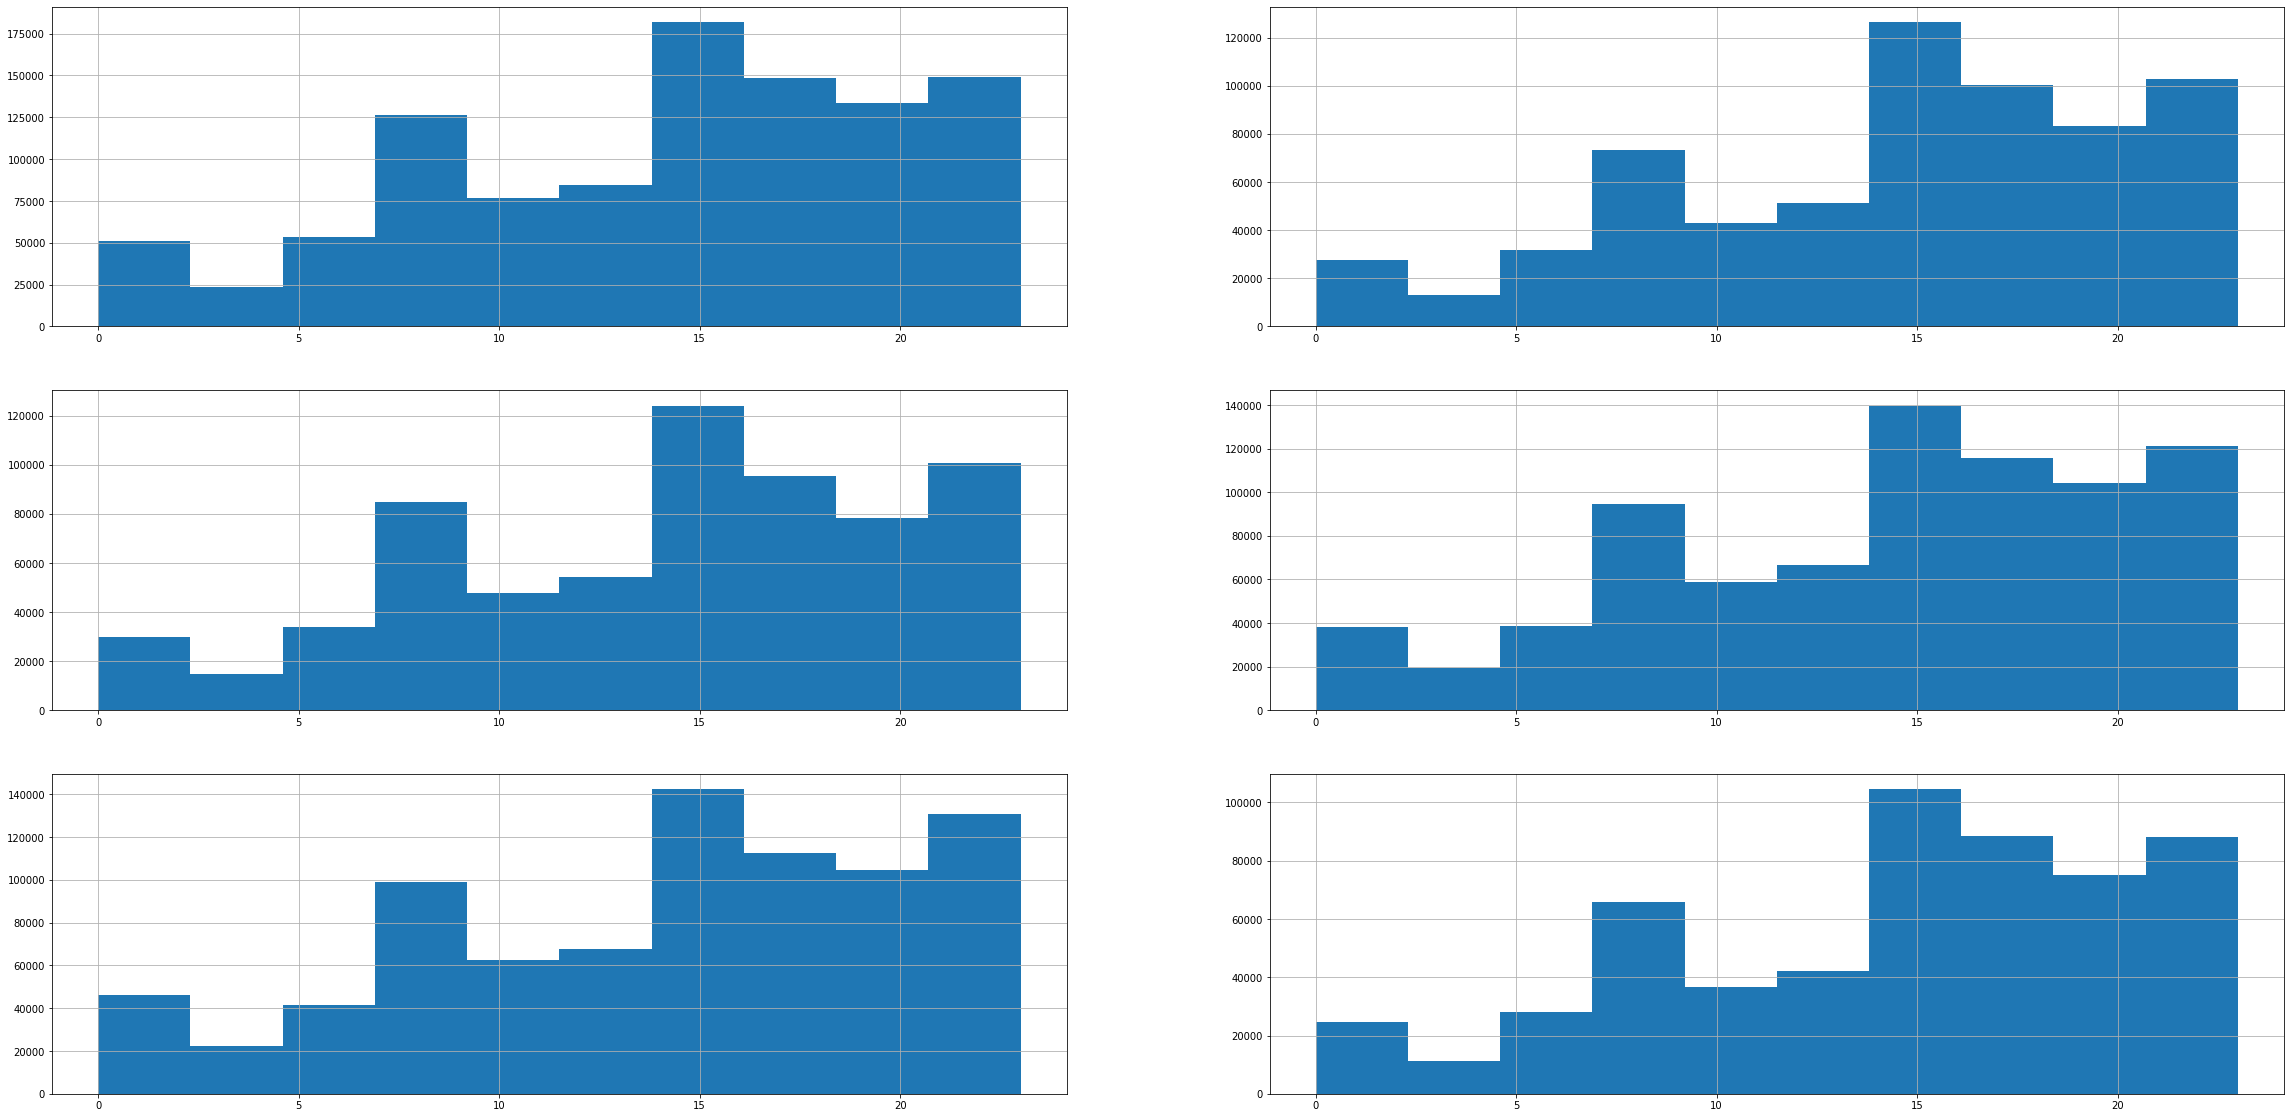

In [30]:
plt.figure(figsize=(40,20))
for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    df[df['month']==month]['hour'].hist()

##### This shows the uber trips are more during the evening hours in all the months

### Analysis of which month has max rides

In [31]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


### Total Number of Hours of service in every month

In [85]:

fig = px.bar(x = df.groupby('month')['hour'].sum().index,
             y = df.groupby('month')['hour'].sum(),
             title="Total Number of Hours of Service in every month" ,
             labels = {
                 'x' : 'Months' ,
                 'y' : 'No. of Hours'
             },
             
            )
fig.update_traces(marker_color='green')
fig.show()



##### This shows that September had the maximum number of hours of service

## Analysis of journey on each day

In [86]:

fig = px.bar(x = df['day'].value_counts().index,
             y = df['day'].value_counts().values,
             title="Total Number of Hours of Service on each date of every month" ,
             labels = {
                 'x' : 'Date' ,
                 'y' : 'Hours of Service'
             },
             
            )

fig.show()

##### This shows that 30th of every month has the maximum number of customers as it has the maximum number of hours

### Analysis of total number of hours on each day in all the months

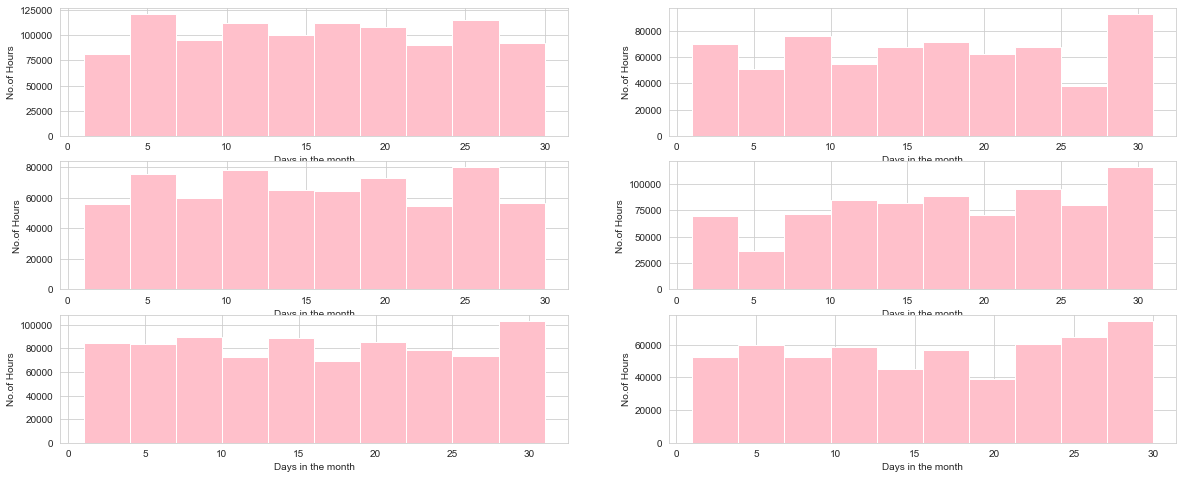

In [80]:
plt.figure(figsize = (20 , 8))
for i , month in enumerate(df['month'].unique() , 1):
    plt.subplot(3,2,i)
    df_out=df[df['month']==month]
    plt.hist(df_out['day'] , color = 'pink')
    plt.xlabel('Days in the month'.format(i))
    plt.ylabel('No.of Hours')

## Getting Rush in Hour

<AxesSubplot:xlabel='month', ylabel='hour'>

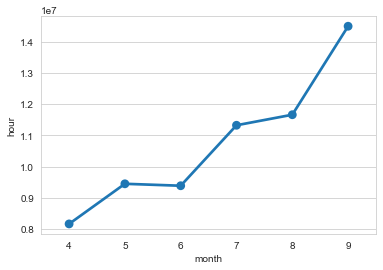

In [36]:
sns.set_style(style = 'whitegrid')
sns.pointplot(x = df.groupby('month')['hour'].sum().index,
              y = df.groupby('month')['hour'].sum())

##### This shows there has been an increase in customers from july to september

Text(0.5, 1.0, 'hoursoffday vs latiitide of passenger')

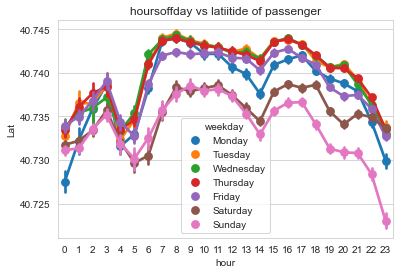

In [37]:

ax=sns.pointplot(x="hour",y="Lat", hue="weekday",data=df)
ax.set_title('hoursoffday vs latiitide of passenger')

In [38]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [39]:
def count_rows(rows):
    return len(rows)

In [40]:
by_cross = df.groupby(['weekday','hour']).apply(count_rows)
by_cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

### Heatmap By Hour and Weekday

In [41]:
pivot = by_cross.unstack()
pivot


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


<AxesSubplot:xlabel='hour', ylabel='weekday'>

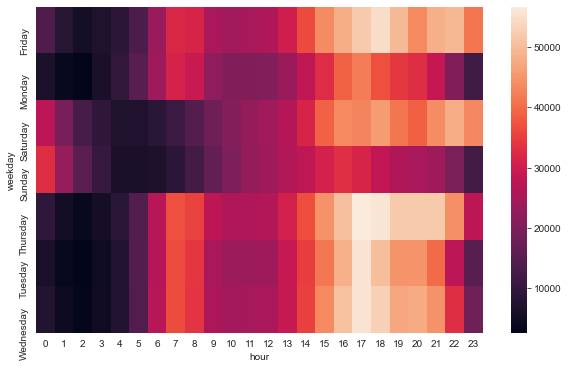

In [42]:

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=False)


### Heatmap by hour and Day

In [43]:
def heatmap(col1,col2):
    by_cross = df.groupby([col1,col2]).apply(lambda x:len(x))
    pivot=by_cross.unstack()
    plt.figure(figsize=(10,6))
    return sns.heatmap(pivot,annot=False)

<AxesSubplot:xlabel='hour', ylabel='day'>

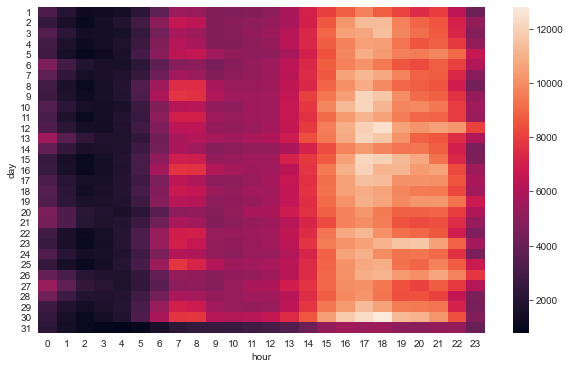

In [44]:
heatmap('day','hour')

<AxesSubplot:xlabel='month', ylabel='day'>

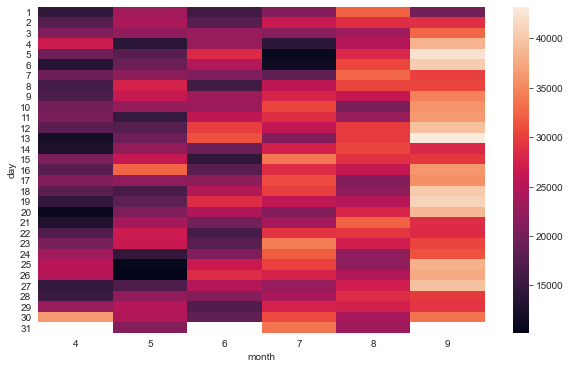

In [45]:
heatmap('day','month')

From April to September 2014, Uber was in a continuous improvement process.

<AxesSubplot:xlabel='month', ylabel='weekday'>

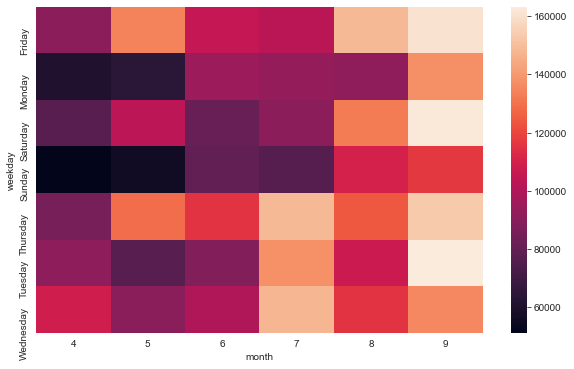

In [46]:
heatmap('weekday' , 'month')